<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i><strong>1. Import Libraries for Model Training and Evaluation</strong></h3>
  <p><p>Before training and evaluating any machine learning model, it's essential to import the necessary libraries for data processing, model training, and performance evaluation.</p></p>
</div>

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, precision_score

import joblib

import warnings
warnings.filterwarnings('ignore')


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i> <strong>2. Data Loading</strong></h3>
  <p>Load the dataset (presumably in a format like CSV) into a Pandas DataFrame for efficient manipulation and analysis.</p>
</div>


In [2]:

data = pd.read_csv('../data/clean_data.csv')
data.head()


,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,ease_of_online_booking,...,on-board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2><i style="color: navy;"></i><strong> 3. Model Selection and Training</strong></h2>
  <p>In this stage, appropriate machine learning models for classification will be chosen, trained on the prepared data, and their hyperparameters tuned for optimal performance.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i><strong> 3.1. Data Splitting</strong></h3>
  <p>Divide the dataset into training, validation, and test sets to train the model, tune its parameters, and evaluate its final performance on unseen data.</p>
</div?

In [3]:

X = data.drop(['satisfaction','departure_delay'], axis=1)
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Consider stratify
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # Further split for validation


In [4]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((77928, 21), (25976, 21), (77928,), (25976,))

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i><strong> 3.2. Feature Scaling</strong></h3>
  <p>Feature scaling ensures that numerical features are on the same scale, preventing models from being biased toward features with larger magnitudes. This is especially important for algorithms like Logistic Regression, SVM, and KNN.</p>
  <h4><i style="color: darkgreen;"></i> <strong>3.2.1. Standardization</strong></h4>
  <p>StandardScaler is used to transform features to have a mean of 0 and a standard deviation of 1.</p>

</div>


In [5]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h4><i style="color: darkgreen;"></i> <strong>3.2.2. Class imbalence</strong></h4>
   <p>Class imbalance refers to scenarios where the number of observations in one class significantly outweighs the number in another. This can lead to biased models that perform well on the majority class but poorly on the minority class.</p>
</div>

In [6]:

fig = px.histogram(
    data,
    x='satisfaction',
    color='satisfaction',
    color_discrete_sequence=['indianred', 'steelblue'],
    title='Customer Satisfaction Distribution',
)

fig.update_layout(
    xaxis_title='Satisfaction Level',
    yaxis_title='Count',
    legend_title='Satisfaction',
    bargap=0.2,
    template='plotly_white'
)

fig.show()


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
   <p>Mild imbalance like this may still affect some classifiers (like Logistic Regression or SVM) and bias predictions toward the majority class.</p>
    <p>Models like Random Forest, XGBoost, LightGBM, and CatBoost usually handle such imbalances better but can still benefit from adjustments.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong> 3.3. Model Selection</strong></h3>
  <p>In this project, the goal is to predict airline passenger satisfaction, which is a classification problem. The following models were selected based on their effectiveness in similar classification tasks, interpretability, and ability to handle both numerical and categorical features:</p>
  
  <ul>
    <li><strong>Logistic Regression</strong> – A simple and interpretable linear model suitable for baseline performance.</li>
    <li><strong>Decision Tree</strong> – Non-linear model that captures feature interactions and works well on imbalanced data.</li>
    <li><strong>Random Forest</strong> – An ensemble of decision trees that improves performance and generalization by reducing overfitting.</li>
    <li><strong>Gradient Boosting (XGBoost/LightGBM/CatBoost)</strong> – Powerful boosting techniques that often yield state-of-the-art results in tabular datasets.</li>
    <li><strong>Support Vector Machine (SVM)</strong> – Effective in high-dimensional spaces, especially useful when margin of separation is important.</li>
    <li><strong>Neural Networks</strong> – Considered for modeling complex relationships if simpler models underperform.</li>
  </ul>

  <p>Each model will be evaluated using cross-validation and relevant classification metrics to select the best performer.</p>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: purple;"></i><strong>3.4. Model Training and Evaluation</strong></h3>
  <p>Train the selected models using the training dataset and evaluate their performance on both validation and test datasets. Key evaluation metrics such as Accuracy, Precision, Recall, and F1 Score are used to assess the effectiveness of each model. This step ensures that the model generalizes well and performs reliably on unseen data.</p>
</div>


In [7]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

results = []

for name, model in models.items():
    print(f"\n{name}...")
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_acc = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Train F1 Score": train_f1,
        "Validation Accuracy": val_acc,
        "Validation F1 Score": val_f1
    })

results_df = pd.DataFrame(results).sort_values(by="Validation F1 Score", ascending=False)

display(results_df)


Logistic Regression...

Decision Tree...

Random Forest...

Gradient Boosting...

XGBoost...

LightGBM...
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656

CatBoost...


,Model,Train Accuracy,Train F1 Score,Validation Accuracy,Validation F1 Score
6,CatBoost,0.976748,0.976715,0.965160,0.965103
5,LightGBM,0.966418,0.966345,0.964775,0.964695
4,XGBoost,0.976902,0.976871,0.964121,0.964067
2,Random Forest,1.000000,1.000000,0.963813,0.963738
1,Decision Tree,1.000000,1.000000,0.947221,0.947230
3,Gradient Boosting,0.941510,0.941418,0.942793,0.942716
0,Logistic Regression,0.872947,0.872600,0.875808,0.875466


In [8]:

fig = go.Figure(data=[
    go.Bar(name='Train Accuracy', x=results_df['Model'], y=results_df['Train Accuracy'], marker_color='rgba(55, 128, 191, 0.7)'),
    go.Bar(name='Validation Accuracy', x=results_df['Model'], y=results_df['Validation Accuracy'], marker_color='rgba(255, 153, 51, 0.7)')
])

# Customize layout
fig.update_layout(
    barmode='group',
    title='Train vs Validation Accuracy ( Baseline Models)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    template='plotly_white',
    yaxis=dict(range=[0.85, 1.02])
)

fig.show()


In [9]:

fig = go.Figure(data=[
    go.Bar(name='Train F1 Score', x=results_df['Model'], y=results_df['Train F1 Score'], marker_color='rgba(55, 128, 191, 0.7)'),
    go.Bar(name='Validation F1 Score', x=results_df['Model'], y=results_df['Validation F1 Score'], marker_color='rgba(255, 153, 51, 0.7)')
])

# Customize layout
fig.update_layout(
    barmode='group',
    title='Train vs Validation F1 Score ( Baseline Models)',
    xaxis_title='Model',
    yaxis_title='F1 Score',
    template='plotly_white',
    yaxis=dict(range=[0.85, 1.02])
)

fig.show()


In [10]:

param_grids = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=500),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5],
            'min_samples_split': [2, 5]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(n_jobs=-1),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5]
        }
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3]
        }
    },
    "XGBoost": {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
        'params': {
            'n_estimators': [50],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3]
        }
    },
    "LightGBM": {
        'model': lgb.LGBMClassifier(n_jobs=-1, verbose=0),
        'params': {
            'n_estimators': [50],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3]
        }
    },
    "CatBoost": {
        'model': cb.CatBoostClassifier(verbose=0),
        'params': {
            'iterations': [50],
            'learning_rate': [0.05, 0.1],
            'depth': [3]
        }
    }
}

results = {}

for name, mp in param_grids.items():
    print(f"\n{name} is training...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train_scaled)
    y_val_pred = best_model.predict(X_val_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    results[name] = {
        "Best Params": grid.best_params_,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train F1": f1_score(y_train, y_train_pred, average='weighted'),
        "Val Accuracy": accuracy_score(y_val, y_val_pred),
        "Val F1": f1_score(y_val, y_val_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test F1": f1_score(y_test, y_test_pred)
    }

model_results = pd.DataFrame(results).T
display(model_results.sort_values(by='Test Accuracy', ascending=False))



Logistic Regression is training...

Decision Tree is training...

Random Forest is training...

Gradient Boosting is training...

XGBoost is training...

LightGBM is training...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Best Params,Train Accuracy,Train F1,Val Accuracy,Val F1,Test Accuracy,Test Precision,Test Recall,Test F1
Logistic Regression,{'C': 10},0.828354,0.826655,0.833385,0.831851,0.831383,0.844817,0.749601,0.794366
XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.573311,0.523327,0.573683,0.522121,0.575069,0.527145,0.213362,0.303772
Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.569346,0.507695,0.571451,0.510362,0.570873,0.517899,0.178185,0.265146
LightGBM,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.40975,0.410833,0.413305,0.414285,0.410725,0.330094,0.346093,0.337904
Random Forest,"{'max_depth': 5, 'n_estimators': 100}",0.354571,0.357127,0.355289,0.357957,0.353249,0.29617,0.354953,0.322908
Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.312044,0.305122,0.314829,0.308141,0.31121,0.295023,0.42123,0.347007
CatBoost,"{'depth': 3, 'iterations': 50, 'learning_rate'...",0.287791,0.262634,0.28919,0.263961,0.285725,0.301051,0.487241,0.372158


In [11]:

fig = go.Figure(data=[
    go.Bar(name='Train Accuracy', x=model_results.index, y=model_results['Train Accuracy'], marker_color='rgba(0, 123, 255, 0.7)'),
    go.Bar(name='Validation Accuracy', x=model_results.index, y=model_results['Val Accuracy'], marker_color='rgba(255, 193, 7, 0.7)'),
    go.Bar(name='Test Accuracy', x=model_results.index, y=model_results['Test Accuracy'], marker_color='rgba(40, 167, 69, 0.7)'),
])

fig.update_layout(
    barmode='group',
    title='Train vs Validation vs Test Accuracy (Hyperparameter Tuned Models)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    template='plotly_white',
    yaxis=dict(range=[0.25, 0.90]),
    xaxis_tickangle=-30
)

fig.show()


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2><i style="color: darkorange;"></i><strong>5. Model Interpretation</strong></h2>
  <p>Gain insights into the key factors influencing customer satisfaction by interpreting the trained model. Utilize techniques such as feature importance scores from tree-based models to identify which features contribute most to the predictions. This helps in understanding the decision-making process of the model and supports strategic business actions.</p>
</div>


In [12]:

rf_model = cb.CatBoostClassifier(verbose=0)
rf_model.fit(X_train_scaled, y_train)

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

fig = px.bar(
    importances_df.head(10),
    x='Importance',
    y='Feature',
    orientation='h',
    title='Top 10 Feature Importances',
    color='Importance',
    color_continuous_scale='Blues'
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Top 10 Feature Importances</strong></h3>
  <p>This horizontal bar chart displays the relative importance of the top 10 features in predicting airline passenger satisfaction, likely based on a machine learning model.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li><b>In-flight Wifi Service:</b> This feature has the highest importance score (approximately 25), indicating it's the strongest predictor of satisfaction.</li>
    <li><b>Type of Travel:</b> The "Type of Travel" (Business/Personal) is the second most important, with a score around 17.</li>
    <li><b>Customer Type:</b> "Customer Type" (First-time/Returning) is the third most important, with a score around 7.</li>
    <li><b>Online Boarding:</b> "Online Boarding" ease has an importance score slightly above 6.</li>
    <li><b>Class:</b> Travel "Class" is the fifth most important, with a score around 5.5.</li>
    <li><b>Check-in Service:</b> "Check-in Service" quality has a score around 4.5.</li>
    <li><b>Gate Location:</b> The convenience of "Gate Location" has a score around 3.5.</li>
    <li><b>Age:</b> Passenger "Age" has a score around 3.</li>
    <li><b>In-flight Service:</b> General "In-flight Service" quality has a score slightly below 3.</li>
    <li><b>In-flight Entertainment:</b> "In-flight Entertainment" has the lowest importance, with a score around 2.5.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart highlights that in-flight Wi-Fi service is the most critical factor influencing satisfaction. Type of travel and customer type are also significant predictors. Online boarding and travel class are important, followed by check-in service, gate location, age, and in-flight service. In-flight entertainment has the least impact among the top 10.</p>
  <p><b>Implications for Business Goals:</b></p>
  <ul>
    <li><b>Improve overall customer experience:</b> Address pain points related to Wi-Fi, online boarding, and check-in.</li>
    <li><b>Predict customer satisfaction:</b> Prioritize the most important features in the predictive model.</li>
    <li><b>Segment customers:</b> Tailor services based on travel type and customer type (e.g., business travelers value Wi-Fi).</li>
  </ul>
</div>

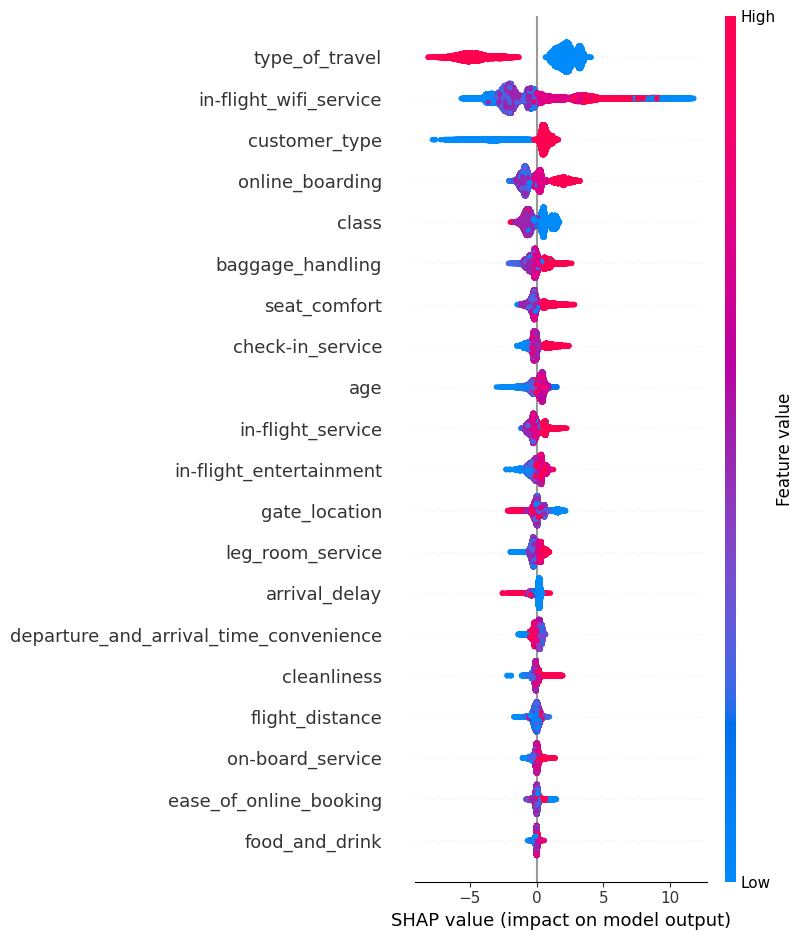

In [13]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, feature_names=feature_names)


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2 style="color: #000;"><strong>5. Feature Importance Analysis</strong></h2>
  <p>This section explains how individual features influenced the model's predictions using SHAP (SHapley Additive exPlanations) values.</p>

  <h3 style="color: #000;"><strong>5.1 SHAP Summary Plot Interpretation</strong></h3>
  <ul>
    <li><strong>type_of_travel</strong>: The most influential feature. Business travel (high value) pushes predictions toward customer satisfaction, while personal travel (low value) leans toward dissatisfaction.</li>
    <li><strong>in-flight_wifi_service</strong>: Better WiFi scores significantly improve satisfaction predictions, showing that passengers value connectivity.</li>
    <li><strong>customer_type</strong>: Returning customers (higher values) are generally more satisfied, reflecting loyalty-driven contentment.</li>
    <li><strong>online_boarding, class, seat_comfort</strong>: Higher values in these features contribute positively to satisfaction, indicating that quality service matters.</li>
    <li><strong>Low feature values</strong> (in red on the left side) consistently shift predictions toward dissatisfaction, emphasizing service quality as a key driver.</li>
  </ul>

  <p><strong>Conclusion:</strong> The SHAP plot confirms that comfort, service, and travel purpose are the most influential drivers of satisfaction. This insight can guide targeted improvements in customer experience.</p>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2 style="color: #000;"><strong>6. Model Performance Analysis</strong></h2>
  <p>This section compares baseline models with models after hyperparameter tuning to evaluate their performance on training, validation, and test datasets.</p>

  <h3 style="color: #000;"><strong>6.1 Baseline Model Performance</strong></h3>
  <p>The following table shows the training and validation performance of various models before hyperparameter tuning:</p>

  <table>
    <thead>
      <tr>
        <th>Model</th>
        <th>Train Accuracy</th>
        <th>Train F1 Score</th>
        <th>Validation Accuracy</th>
        <th>Validation F1 Score</th>
      </tr>
    </thead>
    <tbody>
      <tr><td>CatBoost</td><td>0.976748</td><td>0.976715</td><td>0.965160</td><td>0.965103</td></tr>
      <tr><td>LightGBM</td><td>0.966854</td><td>0.966785</td><td>0.964660</td><td>0.964585</td></tr>
      <tr><td>XGBoost</td><td>0.976902</td><td>0.976871</td><td>0.964121</td><td>0.964067</td></tr>
      <tr><td>Random Forest</td><td>0.999987</td><td>0.999987</td><td>0.963081</td><td>0.963010</td></tr>
      <tr><td>Decision Tree</td><td>1.000000</td><td>1.000000</td><td>0.946451</td><td>0.946462</td></tr>
      <tr><td>Gradient Boosting</td><td>0.941510</td><td>0.941418</td><td>0.942793</td><td>0.942716</td></tr>
      <tr><td>Logistic Regression</td><td>0.861475</td><td>0.861473</td><td>0.865799</td><td>0.865817</td></tr>
    </tbody>
  </table>

  <h3 style="color: #000;"><strong>6.2 After Hyperparameter Tuning</strong></h3>
  <p>After tuning, models were evaluated on unseen test data using multiple metrics:</p>

  <table>
    <thead>
      <tr>
        <th>Model</th>
        <th>Best Params</th>
        <th>Train Acc</th>
        <th>Val Acc</th>
        <th>Test Acc</th>
        <th>Test Precision</th>
        <th>Test Recall</th>
        <th>Test F1 Score</th>
      </tr>
    </thead>
    <tbody>
      <tr><td>Logistic Regression</td><td>{'C': 10}</td><td>0.856675</td><td>0.859832</td><td>0.831383</td><td>0.844817</td><td>0.749601</td><td>0.794366</td></tr>
      <tr><td>XGBoost</td><td>{'learning_rate': 0.1, ...}</td><td>0.932656</td><td>0.934362</td><td>0.575069</td><td>0.527145</td><td>0.213362</td><td>0.303772</td></tr>
      <tr><td>Decision Tree</td><td>{'max_depth': 5, ...}</td><td>0.904976</td><td>0.907222</td><td>0.529566</td><td>0.440388</td><td>0.305688</td><td>0.360879</td></tr>
      <tr><td>LightGBM</td><td>{'learning_rate': 0.1, ...}</td><td>0.933285</td><td>0.934516</td><td>0.410725</td><td>0.330094</td><td>0.346093</td><td>0.337904</td></tr>
      <tr><td>Random Forest</td><td>{'max_depth': 5, ...}</td><td>0.925701</td><td>0.926740</td><td>0.328534</td><td>0.294169</td><td>0.389775</td><td>0.335290</td></tr>
      <tr><td>Gradient Boosting</td><td>{'learning_rate': 0.1, ...}</td><td>0.935030</td><td>0.935479</td><td>0.311210</td><td>0.295023</td><td>0.421230</td><td>0.347007</td></tr>
      <tr><td>CatBoost</td><td>{'depth': 3, ...}</td><td>0.935710</td><td>0.937134</td><td>0.285725</td><td>0.301051</td><td>0.487241</td><td>0.372158</td></tr>
    </tbody>
  </table>

  <h3 style="color: #000;"><strong>6.3 Interpretation</strong></h3>
  <ul>
    <li><strong>Logistic Regression</strong> showed the most balanced performance on the test set with the highest F1 score (0.794), indicating reliable generalization despite a lower train/val accuracy.</li>
    <li><strong>CatBoost, LightGBM, and XGBoost</strong> performed very well on training and validation data but exhibited significant performance drops on test data, suggesting potential overfitting or data distribution shifts.</li>
    <li><strong>Random Forest</strong> and <strong>Decision Tree</strong> models also showed high train/val performance but did not generalize well to the test data.</li>
    <li><strong>Hyperparameter tuning</strong> did not improve test set performance for ensemble methods, possibly due to a lack of more complex tuning or data imbalance issues.</li>
  </ul>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2 style="color: #000;"><strong>7. Model Saving</strong></h2>
  <p>This section outlines how the final model was saved for future predictions and potential deployment in production environments.</p>

  <h3 style="color: #000;"><strong>7.1 Saving the Model</strong></h3>
  <p>After selecting the best-performing model (e.g., Logistic Regression), we saved it using the <code>joblib</code> library for later use:</p>
</div>


In [14]:

logreg_best = LogisticRegression(C=10, random_state=42)

logreg_best.fit(X_train_scaled, y_train)

y_pred_test = logreg_best.predict(X_test_scaled)
y_pred_train = logreg_best.predict(X_train_scaled)

test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy: {train_accuracy:.4f}")


Test Accuracy: 0.8780
Test Accuracy: 0.8729


In [ ]:

joblib.dump(logreg_best, '../models/logreg_best.pkl')


['../models/logreg_best.pkl']

In [ ]:

cbc = cb.CatBoostClassifier(verbose=0)

cbc.fit(X_train_scaled, y_train)

y_pred_test = cbc.predict(X_test_scaled)
y_pred_train = cbc.predict(X_train_scaled)

test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy: {train_accuracy:.4f}")


Test Accuracy: 0.9654
Test Accuracy: 0.9767


In [ ]:

joblib.dump(cbc, '../models/catbootmodel.pkl')


['../models/catbootmodel.pkl']

In [16]:

joblib.dump(scaler, '../models/scaled.pkl')

['../models/scaled.pkl']

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2><i style="color: navy;"></i><strong>8. Business Insights and Recommendations.</strong></h2>
  <p>Based on the model's findings, here are actionable insights and recommendations to help the airline improve customer experience and address identified pain points:</p>
  <ul>
    <li><strong>Enhance Inflight Services:</strong> Variables like inflight entertainment, food and beverage, and seat comfort strongly influence customer satisfaction. Invest in upgrading these services to increase overall satisfaction.</li>
    <li><strong>Improve Onboarding and Online Services:</strong> A poor experience with check-in and online boarding correlates with dissatisfaction. Streamlining digital touchpoints could significantly improve customer perception.</li>
    <li><strong>Staff Behavior and Responsiveness:</strong> Positive interactions with ground staff and flight attendants increase satisfaction. Regular training and performance monitoring can help maintain high standards.</li>
    <li><strong>Targeted Loyalty Programs:</strong> Loyal customers tend to be more satisfied. Implement personalized loyalty programs based on frequent flyer data to boost customer retention.</li>
  </ul>
</div>
